In [112]:

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import plotly.express as px


In [113]:
sd = pd.read_csv('F:/PyCharm/Data Visualization/Steam Data/Valve_Player_Data.csv')
sd.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive


In [114]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month_Year    5271 non-null   object 
 1   Avg_players   5271 non-null   float64
 2   Gain          5173 non-null   float64
 3   Percent_Gain  5173 non-null   object 
 4   Peak_Players  5271 non-null   int64  
 5   URL           5271 non-null   object 
 6   Date          5271 non-null   object 
 7   Game_Name     5271 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 329.6+ KB


In [115]:
sd.describe()

,Avg_players,Gain,Peak_Players
count,5.271000e+03,5173.000000,5.271000e+03
mean,3.763149e+04,92.071786,7.032072e+04
std,1.032951e+05,15161.864515,1.941948e+05
min,0.000000e+00,-250248.990000,0.000000e+00
25%,6.720205e+03,-1374.480000,1.302900e+04
50%,1.235840e+04,-0.080000,2.344700e+04
75%,2.414976e+04,1255.140000,4.610150e+04
max,1.584887e+06,426446.120000,3.236027e+06


In [116]:
sd.columns

Index(['Month_Year', 'Avg_players', 'Gain', 'Percent_Gain', 'Peak_Players',
       'URL', 'Date', 'Game_Name'],
      dtype='object')

In [117]:
sd.isnull().sum()

Month_Year       0
Avg_players      0
Gain            98
Percent_Gain    98
Peak_Players     0
URL              0
Date             0
Game_Name        0
dtype: int64

In [118]:
data_clean = sd
data_clean=data_clean.dropna()

In [119]:
data_clean.isna().sum()

Month_Year      0
Avg_players     0
Gain            0
Percent_Gain    0
Peak_Players    0
URL             0
Date            0
Game_Name       0
dtype: int64

In [120]:
fig = pd.read_csv("Valve_Player_Data.csv", index_col=0, parse_dates=True)
fig.head()

,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
Month_Year,,,,,,,
2021-09-01,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
2021-08-01,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2021-07-01,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
2021-06-01,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
2021-05-01,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive


<AxesSubplot:xlabel='Month_Year'>

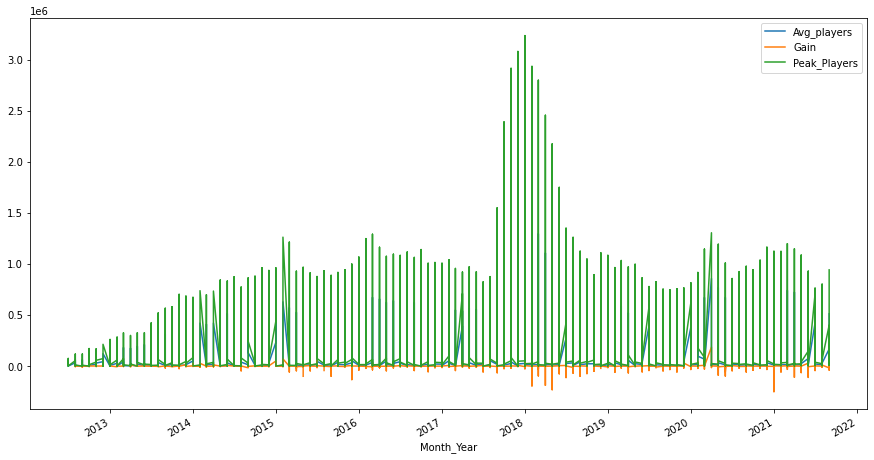

In [121]:
fig.plot(figsize=(15, 8))


In [122]:
sd1 = data_clean.groupby('Game_Name', as_index=False, sort=True)[
    'Avg_players'].mean()

sd1 = sd1.sort_values('Avg_players', ascending=False)
sd1.head(10)


,Game_Name,Avg_players
23,Dota 2,454686.103727
54,PUBG: Battlegrounds,451871.999444
13,Counter Strike: Global Offensive,330019.465636
3,Apex Legends,124925.043000
20,Destiny 2,66768.013913
40,Grand Theft Auto V,65219.183766
48,NARAKA: BLADEPOINT,64272.230000
72,Team Fortress 2,55174.296364
79,Tom Clancy's Rainbow Six Seige,54238.015507
84,Valheim,53098.742857


In [123]:
# Creating new CSV for columns Game_Name and Avg_players
sd2 = print(sd1.head(10).to_csv("sd1.csv"))


None


In [124]:
sd2 = pd.read_csv('sd1.csv')
sd2


,Unnamed: 0,Game_Name,Avg_players
0,23,Dota 2,454686.103727
1,54,PUBG: Battlegrounds,451871.999444
2,13,Counter Strike: Global Offensive,330019.465636
3,3,Apex Legends,124925.043000
4,20,Destiny 2,66768.013913
5,40,Grand Theft Auto V,65219.183766
6,48,NARAKA: BLADEPOINT,64272.230000
7,72,Team Fortress 2,55174.296364
8,79,Tom Clancy's Rainbow Six Seige,54238.015507
9,84,Valheim,53098.742857


In [125]:
table = pd.pivot_table(data=data_clean, index=['Game_Name', 'Month_Year'], values=['Avg_players'])
table


Avg_players
Game_Name         Month_Year                 
7 Days to Die     April 2014          1877.59
                  April 2015          6592.51
                  April 2016          7153.62
                  April 2017          8710.61
                  April 2018          7647.83
...                                       ...
雀魂麻将(MahjongSoul) May 2021            3038.03
                  November 2020       1102.75
                  October 2020        1118.37
                  September 2020      1485.79
                  September 2021      6926.76

[5173 rows x 1 columns]

In [126]:
table = pd.pivot_table(data=data_clean, index=['Month_Year', 'Percent_Gain'])
table


Avg_players      Gain  Peak_Players
Month_Year     Percent_Gain                                     
April 2013     +0.29%           16006.00     46.11       31966.0
               +18.84%           6050.11    959.07       11856.0
               +529.02%         12329.65  10369.52       21157.0
               -1.42%               4.00     -0.06          22.0
               -11.37%          21436.10  -2749.15       39478.0
...                                  ...       ...           ...
September 2021 -8.31%            5802.66   -525.87       11942.0
               -9.23%           44196.05  -4492.35       73590.0
               -9.59%          167102.12 -17726.28      400709.0
               -9.62%            9982.46  -1062.04       17674.0
               -9.73%           33150.16  -3573.54       64001.0

[5154 rows x 3 columns]

In [127]:
table = pd.pivot_table(data_clean, index=['Game_Name'], aggfunc={'Avg_players':np.mean, 'Gain':np.sum})
table

,Avg_players,Gain
Game_Name,,
7 Days to Die,10202.705376,17075.57
ARK: Survival Evolved,43545.970526,39484.19
Age of Empires II: Definitive Edition,14937.882727,659.53
Apex Legends,124925.043000,64690.70
Arma 3,15331.171176,7903.84
...,...,...
World of Warships,5867.909574,7288.64
Yu-Gi-Oh! Duel Links,7635.712826,-1059.82
eFootball PES 2021 SEASON UPDATE,9857.313333,2524.49


In [128]:
fig = px.line(data_clean, x="Month_Year", y="Avg_players", color='Game_Name', title='Avg Players Over the Years')
fig.show()

[Text(0, 0, 'Dota 2'),
 Text(1, 0, 'PUBG: Battlegrounds'),
 Text(2, 0, 'Counter Strike: Global Offensive'),
 Text(3, 0, 'Apex Legends'),
 Text(4, 0, 'Destiny 2'),
 Text(5, 0, 'Grand Theft Auto V'),
 Text(6, 0, 'NARAKA: BLADEPOINT'),
 Text(7, 0, 'Team Fortress 2'),
 Text(8, 0, "Tom Clancy's Rainbow Six Seige"),
 Text(9, 0, 'Valheim')]

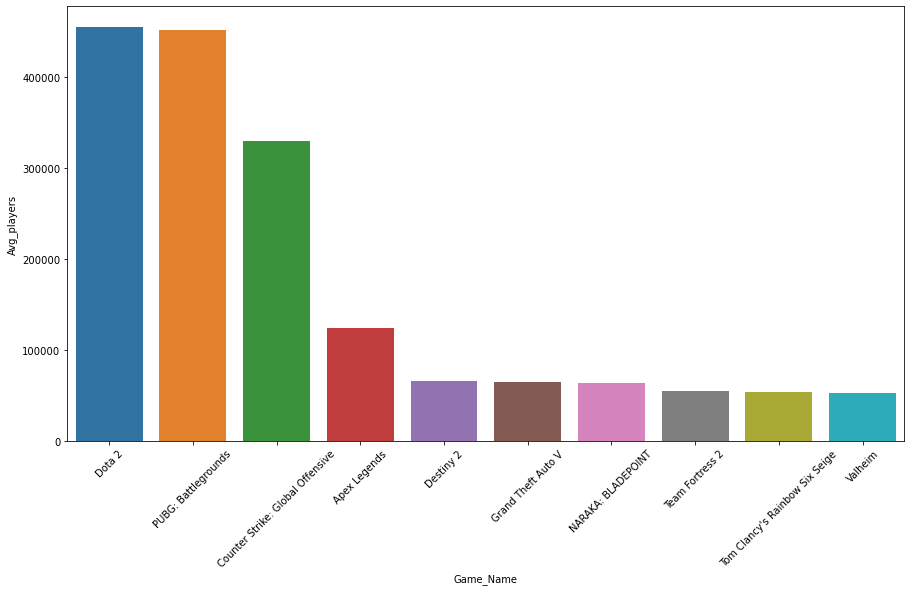

In [129]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Game_Name', y='Avg_players', data=sd2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



In [130]:
sd3 = data_clean.groupby('Game_Name', as_index=False, sort=True)[
    'Peak_Players'].mean()
sd3 = sd3.sort_values('Peak_Players', ascending=False)
sd3.head(10)


,Game_Name,Peak_Players
54,PUBG: Battlegrounds,998869.925926
23,Dota 2,784588.000000
13,Counter Strike: Global Offensive,577124.881818
3,Apex Legends,234866.200000
48,NARAKA: BLADEPOINT,160720.000000
20,Destiny 2,130109.739130
40,Grand Theft Auto V,127191.636364
84,Valheim,122327.571429
79,Tom Clancy's Rainbow Six Seige,101828.159420
46,Monster Hunter: World,89808.540541


In [131]:
print(sd3.head(10).to_csv("sd3.csv"))

None


In [132]:
sd4 = pd.read_csv('sd3.csv')
sd4


,Unnamed: 0,Game_Name,Peak_Players
0,54,PUBG: Battlegrounds,998869.925926
1,23,Dota 2,784588.000000
2,13,Counter Strike: Global Offensive,577124.881818
3,3,Apex Legends,234866.200000
4,48,NARAKA: BLADEPOINT,160720.000000
5,20,Destiny 2,130109.739130
6,40,Grand Theft Auto V,127191.636364
7,84,Valheim,122327.571429
8,79,Tom Clancy's Rainbow Six Seige,101828.159420
9,46,Monster Hunter: World,89808.540541


[Text(0, 0, 'PUBG: Battlegrounds'),
 Text(1, 0, 'Dota 2'),
 Text(2, 0, 'Counter Strike: Global Offensive'),
 Text(3, 0, 'Apex Legends'),
 Text(4, 0, 'NARAKA: BLADEPOINT'),
 Text(5, 0, 'Destiny 2'),
 Text(6, 0, 'Grand Theft Auto V'),
 Text(7, 0, 'Valheim'),
 Text(8, 0, "Tom Clancy's Rainbow Six Seige"),
 Text(9, 0, 'Monster Hunter: World')]

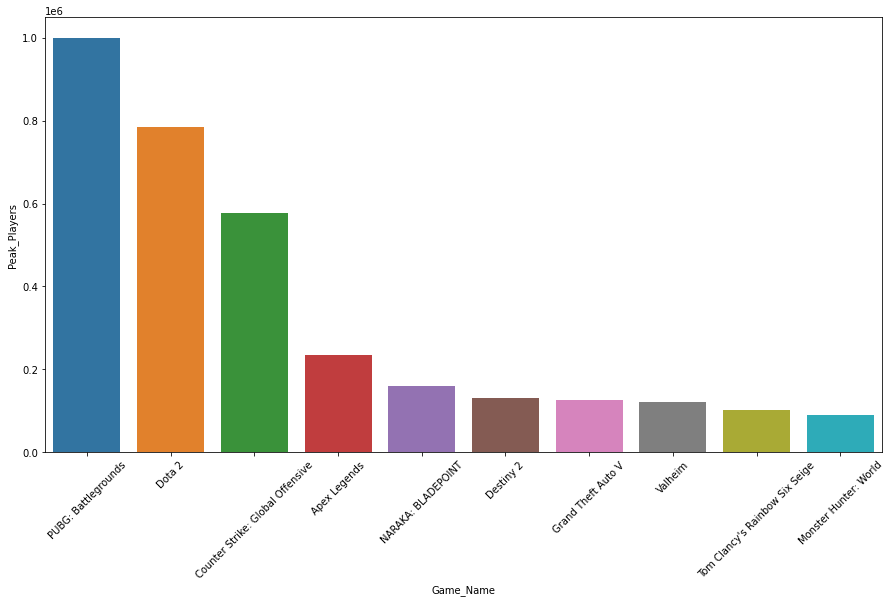

In [133]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Game_Name', y='Peak_Players', data=sd4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [134]:
data_clean.groupby('Game_Name', as_index=False, sort=False)[
    'Peak_Players'].sum()
sd5 = data_clean.sort_values('Peak_Players', ascending=False)
sd5.head(10)

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
266,January 2018,1584886.77,148728.26,+10.36%,3236027,https://steamcharts.com/app/578080,2018-01-01,PUBG: Battlegrounds
267,December 2017,1436158.51,101988.42,+7.64%,3080769,https://steamcharts.com/app/578080,2017-12-01,PUBG: Battlegrounds
265,February 2018,1391015.30,-193871.48,-12.23%,2934761,https://steamcharts.com/app/578080,2018-02-01,PUBG: Battlegrounds
268,November 2017,1334170.09,247531.23,+22.78%,2915723,https://steamcharts.com/app/578080,2017-11-01,PUBG: Battlegrounds
264,March 2018,1295408.59,-95606.71,-6.87%,2799269,https://steamcharts.com/app/578080,2018-03-01,PUBG: Battlegrounds
263,April 2018,1107181.80,-188226.79,-14.53%,2456361,https://steamcharts.com/app/578080,2018-04-01,PUBG: Battlegrounds
269,October 2017,1086638.87,426446.12,+64.59%,2390946,https://steamcharts.com/app/578080,2017-10-01,PUBG: Battlegrounds
262,May 2018,876180.64,-231001.16,-20.86%,2175704,https://steamcharts.com/app/578080,2018-05-01,PUBG: Battlegrounds
261,June 2018,800668.23,-75512.41,-8.62%,1750216,https://steamcharts.com/app/578080,2018-06-01,PUBG: Battlegrounds
270,September 2017,660192.74,270665.33,+69.49%,1550463,https://steamcharts.com/app/578080,2017-09-01,PUBG: Battlegrounds


In [137]:
# plt.figure(figsize=(15, 8))
# ax = sns.barplot(x='Game_Name', y='Peak_Players', data=sd5)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [141]:

pubg = data_clean.groupby("Game_Name")

pubg2 = pubg.get_group('PUBG: Battlegrounds')

In [174]:
pubg2.head(5)

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
222,September 2021,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,PUBG: Battlegrounds
223,August 2021,184828.40,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,PUBG: Battlegrounds
224,July 2021,186249.97,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,PUBG: Battlegrounds
225,June 2021,179338.27,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,PUBG: Battlegrounds
226,May 2021,184701.21,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,PUBG: Battlegrounds


[Text(0, 0, 'September 2021'),
 Text(1, 0, 'August 2021'),
 Text(2, 0, 'July 2021'),
 Text(3, 0, 'June 2021'),
 Text(4, 0, 'May 2021'),
 Text(5, 0, 'April 2021'),
 Text(6, 0, 'March 2021'),
 Text(7, 0, 'February 2021'),
 Text(8, 0, 'January 2021'),
 Text(9, 0, 'December 2020'),
 Text(10, 0, 'November 2020'),
 Text(11, 0, 'October 2020'),
 Text(12, 0, 'September 2020'),
 Text(13, 0, 'August 2020'),
 Text(14, 0, 'July 2020'),
 Text(15, 0, 'June 2020'),
 Text(16, 0, 'May 2020'),
 Text(17, 0, 'April 2020'),
 Text(18, 0, 'March 2020'),
 Text(19, 0, 'February 2020'),
 Text(20, 0, 'January 2020'),
 Text(21, 0, 'December 2019'),
 Text(22, 0, 'November 2019'),
 Text(23, 0, 'October 2019'),
 Text(24, 0, 'September 2019'),
 Text(25, 0, 'August 2019'),
 Text(26, 0, 'July 2019'),
 Text(27, 0, 'June 2019'),
 Text(28, 0, 'May 2019'),
 Text(29, 0, 'April 2019'),
 Text(30, 0, 'March 2019'),
 Text(31, 0, 'February 2019'),
 Text(32, 0, 'January 2019'),
 Text(33, 0, 'December 2018'),
 Text(34, 0, 'Novembe

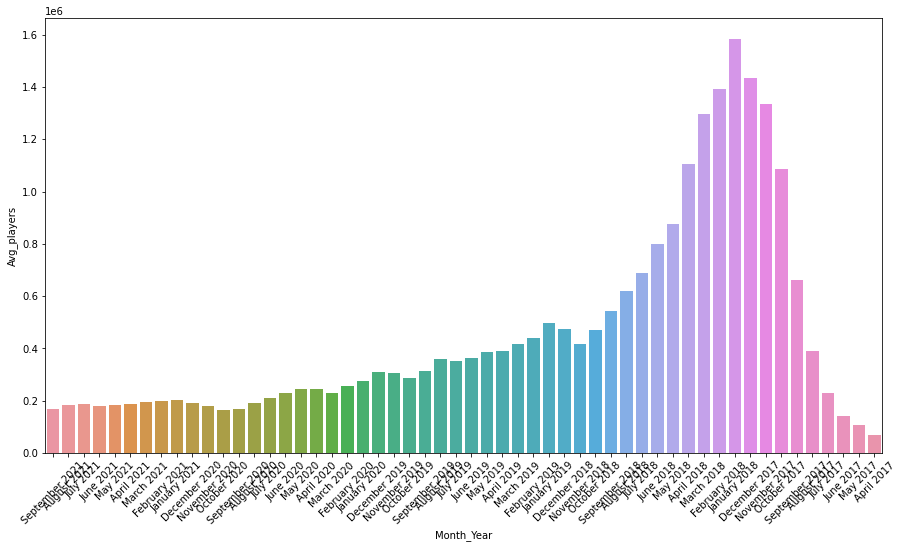

In [155]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Month_Year', y='Avg_players', data=pubg2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)